In [38]:
import os
import sys
import random

In [52]:
project_path = os.path.join(os.getcwd(), "../../")
project_path

'/data/ephemeral/home/upstageailab-cv-classification-cv_4/notebooks/lmw/../../'

In [53]:
import inspect
from tqdm import tqdm
from pathlib import Path

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from augraphy import *

In [54]:

def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)

set_seed(42)

In [55]:
pipeline = AugraphyPipeline(
    ink_phase=[
        InkBleed(),         # 잉크 번짐
        InkShifter(),       # 잉크 밀림
    ],
    paper_phase=[
        NoiseTexturize(),   # 배경 종이 질감
    ],
    post_phase=[
        Geometric(),        # 기울이기, 투시 왜곡
        DirtyDrum(),        # 인쇄 노이즈
        Jpeg(),             # 압축 노이즈
    ]
)

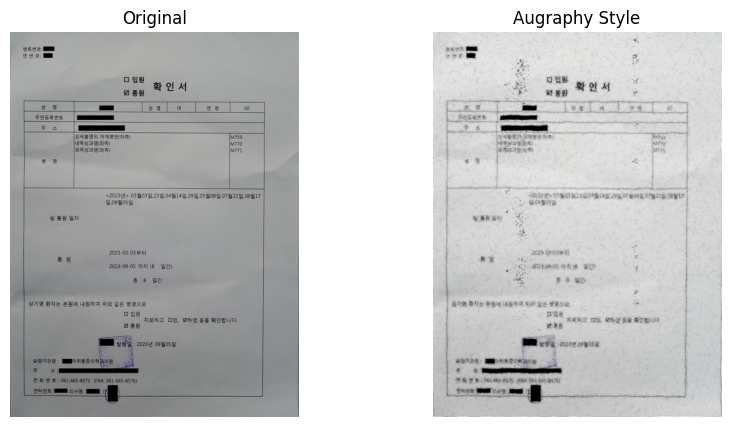

In [70]:
img = Image.open(os.path.join(project_path, "data/train/feeade617aa68c45.jpg"))
img_np = np.array(img)

# 파이프라인 정의
pipeline = AugraphyPipeline(
    ink_phase=[InkBleed(), InkShifter()],
    paper_phase=[NoiseTexturize()],
    post_phase=[Geometric(), DirtyDrum(), Jpeg()]
)

# 증강 실행
aug_img = pipeline(img_np)
aug_pil = Image.fromarray(aug_img)

# 시각화
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(aug_pil, cmap='gray'); plt.title("Augraphy Style"); plt.axis("off")
plt.show()

In [71]:
from augraphy import *
import random

paper_phase = [
    OneOf(
        [
            DelaunayTessellation(
                n_points_range=(500, 800),
                n_horizontal_points_range=(500, 800),
                n_vertical_points_range=(500, 800),
                noise_type="random",
                color_list="default",
                color_list_alternate="default",
            ),
            PatternGenerator(
                imgx=random.randint(256, 512),
                imgy=random.randint(256, 512),
                n_rotation_range=(10, 15),
                color="random",
                alpha_range=(0.35, 0.7),  # 더 강한 질감
            ),
            VoronoiTessellation(
                mult_range=(80, 120),               # 더 강한 분할
                num_cells_range=(800, 1500),        # 더 조밀하게
                noise_type="random",
                background_value=(180, 230),        # 더 어두운 톤
            ),
        ],
        p=1.0,
    ),
    AugmentationSequence(
        [
            NoiseTexturize(
                sigma_range=(20, 30),              # 더 뭉친 노이즈
                turbulence_range=(8, 15),          # 왜곡 세게
            ),
            BrightnessTexturize(
                texturize_range=(0.75, 0.9),       # 어두운 텍스처
                deviation=0.08,                    # 밝기 흔들림 증가
            ),
        ],
    ),
]

pipeline = AugraphyPipeline(paper_phase=paper_phase)

img = Image.open(os.path.join(project_path, "data/train/f82b35c533b6fa81.jpg"))
img_np = np.array(img)

In [77]:
rows = 10
prev_aug = None
aug_imgs = []
for i in range(rows):
    # Augraphy 적용
    set_seed(42)
    aug_np = pipeline(img_np)

    if prev_aug is not None:
        if np.array_equal(prev_aug, aug_np):
            print(f"Iter {i}: Same as previous")
        else:
            print(f"Iter {i}: Different from previous")

    prev_aug = aug_np.copy()
    
    aug_imgs.append(aug_np)

Iter 1: Same as previous
Iter 2: Same as previous
Iter 3: Same as previous
Iter 4: Same as previous
Iter 5: Same as previous
Iter 6: Same as previous
Iter 7: Same as previous
Iter 8: Same as previous
Iter 9: Same as previous


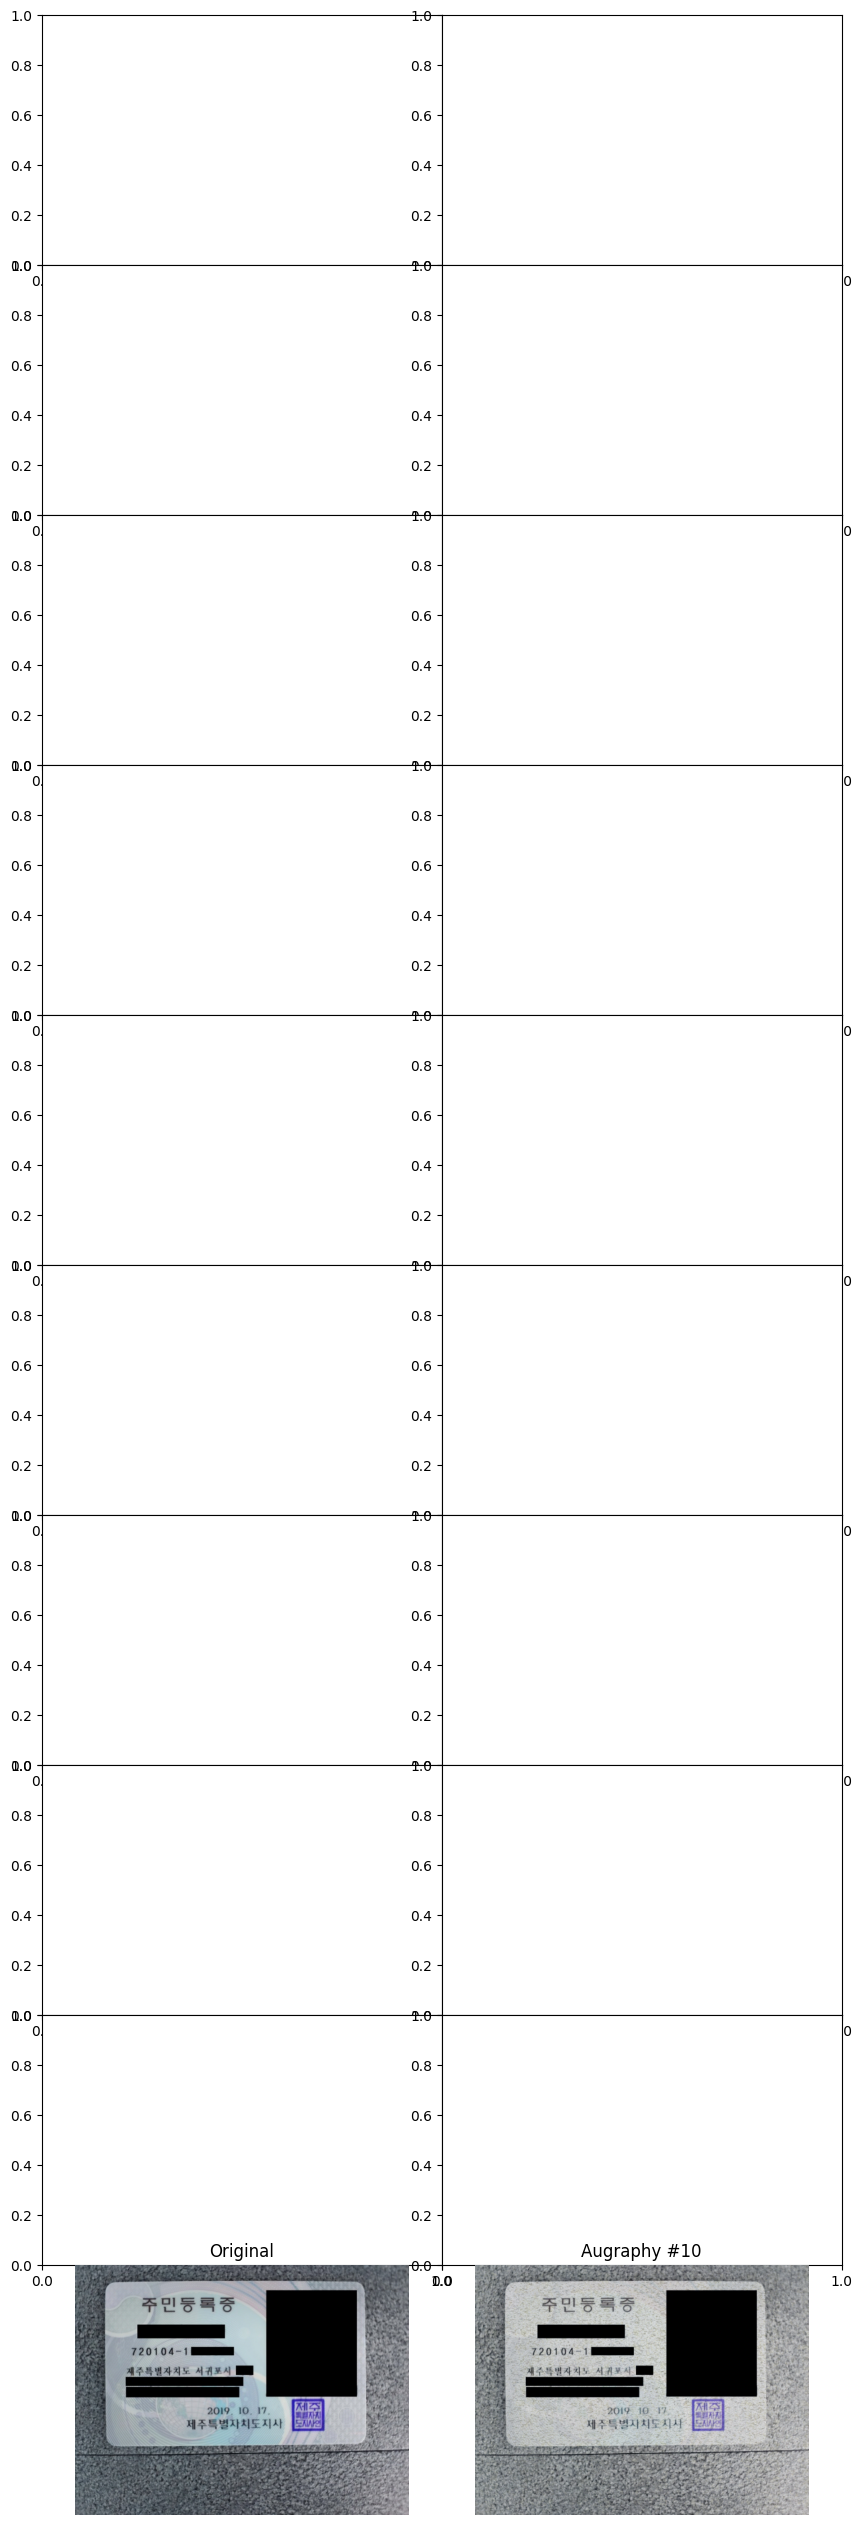

In [78]:
fig, axes = plt.subplots(rows, 2, figsize=(8, rows * 2.5))
for aug_np in aug_imgs:
    # 왼쪽: 원본
    axes[i, 0].imshow(img_np, cmap="gray")
    axes[i, 0].set_title(f"Original")
    axes[i, 0].axis("off")

    # 오른쪽: 증강본
    axes[i, 1].imshow(aug_np, cmap="gray")
    axes[i, 1].set_title(f"Augraphy #{i+1}")
    axes[i, 1].axis("off")

# 여백 제거
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, top=1, bottom=0)
plt.show()